### How do we choose thresholds?

A really high one will cause us to miss out on genuine spiral spaxels. A really low one will cause false positives. What to do?

There isn't a definitive answer. We simple plot galaxy images with the spiral areas identified with each threshold, and then visually choose the best one. If you're looking into particular kinds of galaxies, it may eb helpful to repeat this exercise to judge the best threshold for you. We're going to apply this to all the usable galaxies in our sample.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import warnings

sys.path.append(os.path.abspath('../../GZ3D_production/'))
from gz3d_fits import gz3d_fits

/home/sshamsi/miniconda3/envs/marvin/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to MPL-11


In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
available_filepaths = np.load('available_spirals.npy', allow_pickle=True)

We'll select some random galaxy paths from our sample to see how they fare with each threshold.

First we need to determine what thresholds we are testing. Through the power of hindsight (I've done this before), I know that generally a threshold of ~3 works best. You may chnage this according to your needs.

In [4]:
thresholds = np.linspace(2, 5, 4)
thresholds

array([2., 3., 4., 5.])

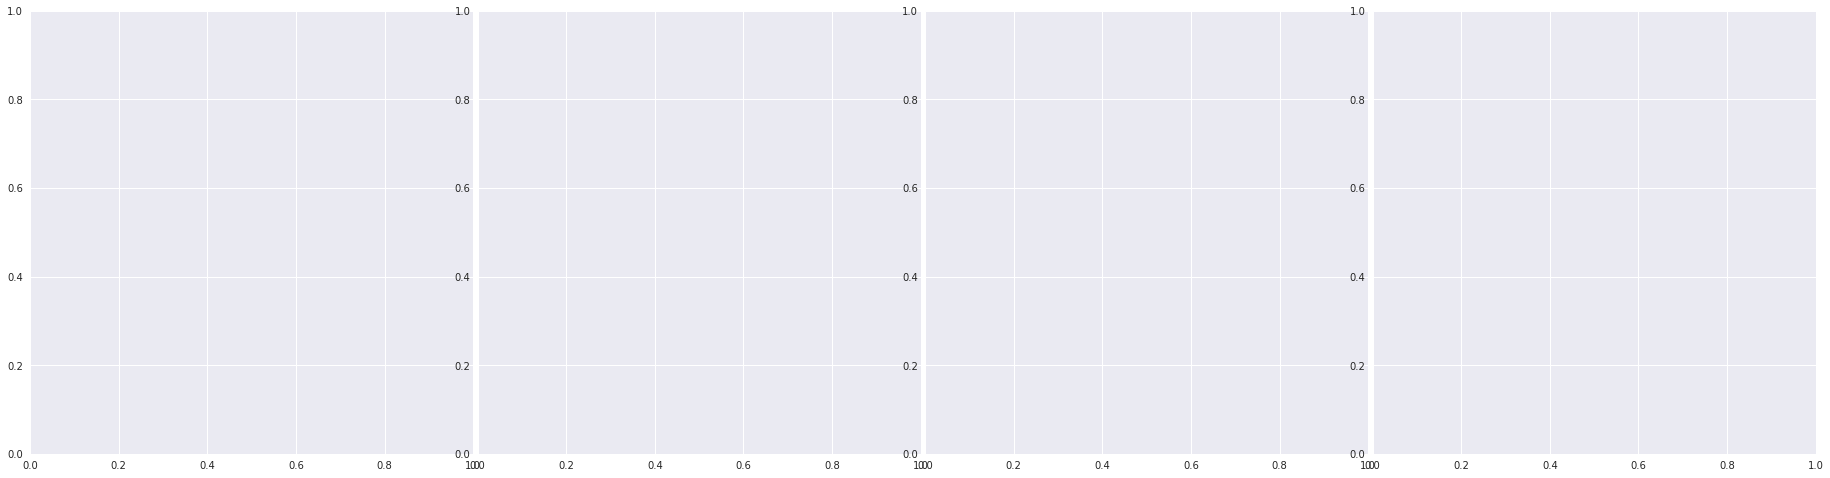

In [5]:
rand_paths = np.random.choice(available_filepaths, size=5) #making an raay of 50 random galaxies

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 32*4))

for path in available_filepaths:
    filename = path.split('/')[-1] + '.png'
    
    data = gz3d_fits(path)
    img = data.image
    spiral_mask = data.spiral_mask
        
    axes[0].text(13, 500, 'MaNGA ID: {}'.format(data.metadata['MANGAID'][0]), color='white', size=16)
    
    for ax, threshold in zip(axes, thresholds):
        ax.axis('off')
        ax.imshow(img)
        
        with warnings.catch_warnings(record=True) as w:
            ax.contour(spiral_mask > threshold, levels=1, colors='white')
            ax.text(13, 29, 'Threshold: {}'.format(str(threshold)), color='white', size=16)
            
            if len(w) > 0:
                ax.text(13, 50, 'No classifications found for threshold', color='white', size=14)
                
    plt.subplots_adjust(wspace=0.01, hspace=0)
    plt.savefig('Images_Comparing_Thresholds/{}'.format(filename), format='png', bbox_inches='tight')
    
    for ax in axes:
        ax.cla()

Now we have 2296 galaxy images in the `Images_Comparing_Thresholds` folder. We can go through them (or a subset of them really) to figure out what threshold works best for us. And indeed it seems like a threshold of 3 works best for us! Different analyses may require different subsets, and therefor may change what kind of threshold works best.

Next, we'll try to narrow down our sample more by ensuring we use only galaxies which have spirals identified. In the meantime, we'll also go make resources for the `available_spiral.npy` path, in case we need to use them.